In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sales=pd.read_csv('D:/pythonCode/projects/SUPERSTORE-SALES-PREDICTION/DATA/test/train.csv')

In [7]:
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12-06-2017,16-06-2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# taking a quick look at our data


In [9]:
sales.shape

(9800, 18)

* there are 9800 rows  and 18 columns

In [10]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [11]:
print(sales.isna().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [13]:
# change data type of "Order Date" and "Ship Date" to datetime format
sales['Order Date'] = pd.to_datetime(sales['Order Date'], format="%d-%m-%Y")
sales['Ship Date'] = pd.to_datetime(sales['Ship Date'], format="%d-%m-%Y")
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

checking 'Postal Code' column data for null values

In [14]:
sales[sales['Postal Code'].isna()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,2018-12-05,2018-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,2016-11-07,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,2017-04-06,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [15]:
# First dates and last dates of Order dates and Ship dates
print("Describe Order date:")
print(sales['Order Date'].describe(), "\n")
print("Describe Ship date:")
print(sales['Ship Date'].describe())

Describe Order date:
count                    9800
unique                   1230
top       2017-09-05 00:00:00
freq                       38
first     2015-01-03 00:00:00
last      2018-12-30 00:00:00
Name: Order Date, dtype: object 

Describe Ship date:
count                    9800
unique                   1326
top       2018-09-26 00:00:00
freq                       34
first     2015-01-07 00:00:00
last      2019-01-05 00:00:00
Name: Ship Date, dtype: object


C:\Users\Chara\AppData\Local\Temp/ipykernel_7504/441398219.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(sales['Order Date'].describe(), "\n")
C:\Users\Chara\AppData\Local\Temp/ipykernel_7504/441398219.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(sales['Ship Date'].describe())


In [16]:
# unique counts of all values in the data
sales.nunique()

Row ID           9800
Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64

- Top Customer Names, Top Citys, Top States, Top Product Names
- Ship Mode, Segment, Region, Category, Sub-Category 

# Exploratory data Analysis

## BY CHARAN 

### Most Values Customers

get the top 20 customers who has generated max revenue/profit for the company.

In [17]:
DATA1=pd.DataFrame()
DATA1=sales[0:1600]
DATA1.shape

(1600, 18)

In [18]:
top_customers = DATA1.groupby(by=['Customer Name']).sum().round(2)
top_customers = top_customers.sort_values('Sales', ascending=False).head(20)

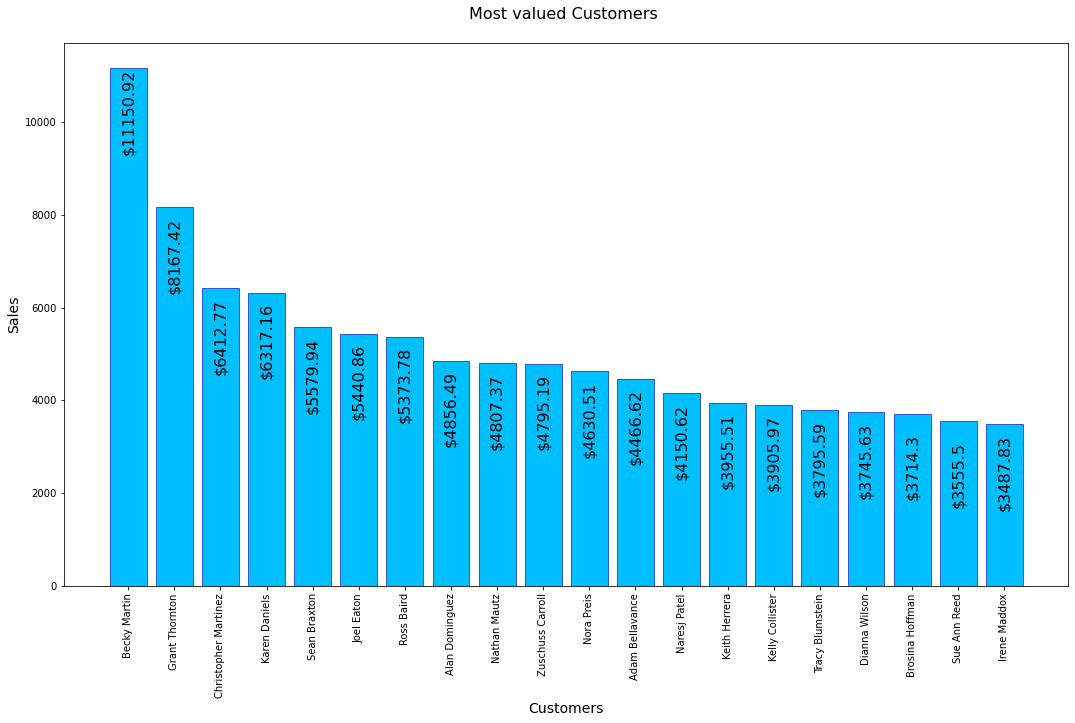

In [29]:
# plot bar of the top valued customers
plt.figure(figsize=[18,10])
plt.bar(top_customers.index, top_customers.Sales, color='#00BFFF', edgecolor='#3457D5')
plt.xticks(rotation=90)
plt.title("Most valued Customers \n", fontsize=16)
plt.xlabel('Customers', fontsize=14)
plt.ylabel('Sales', fontsize=14)

for i, v in enumerate(top_customers.Sales):
    plt.text(i, v-1800, s='$'+str(v), color='k', fontsize=16 ,rotation=90, horizontalalignment='center')
    
plt.show()

BECKY MARTIN WAS THE MOST VALUABLE CUSTOMER FOR DATA1

### Top Revenue Generated Cites

Let's get the top Revenue generating cites for the company.

In [30]:
top_cities = DATA1.groupby(by=['City']).sum().round(2)
top_cities = top_cities.sort_values('Sales', ascending=False).head(20)

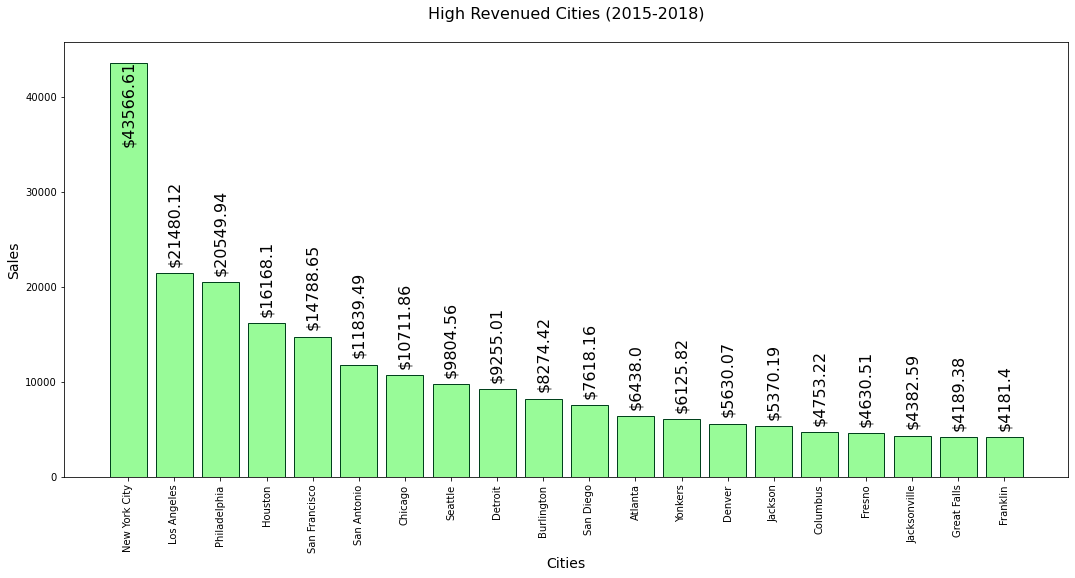

In [54]:
# plot bar of the top revenue generated Cities
plt.figure(figsize=[18,8])
plt.bar(top_cities.index, top_cities.Sales, color='#98FB98', edgecolor='#01411C')
plt.xticks(rotation=90)
plt.title("High Revenued Cities (2015-2018)\n", fontsize=16)
plt.xlabel('Cities', fontsize=14)
plt.ylabel('Sales', fontsize=14)

for i, v in top_cities.Sales.items():
    if v>40000:
        plt.text(i, v-8500, s='$'+str(v), color='k', fontsize=16 ,rotation=90, horizontalalignment='center')
    else:
        plt.text(i, v+1000, s='$'+str(v), color='k', fontsize=16 ,rotation=90, horizontalalignment='center')
    
plt.show()

NEW YORK GENERATED HIGHEST REVENUE IN DATA1

### Top Revenue Generated States

let's get the top Revenue generated states for the company

In [55]:
top_states = DATA1.groupby(by=['State']).sum().round(2)
top_states = top_states.sort_values('Sales', ascending=False).head(20)

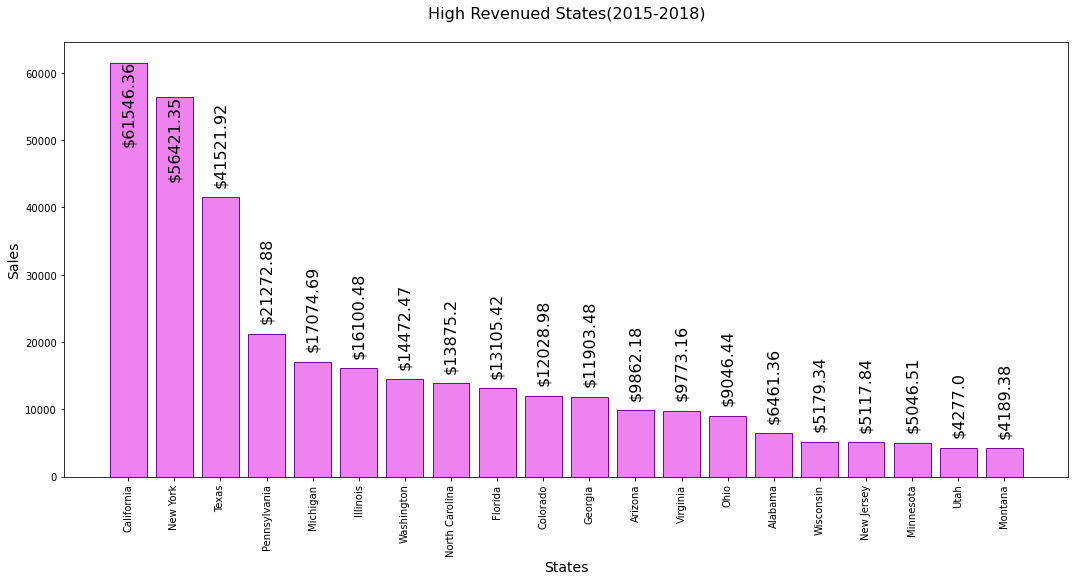

In [59]:
# plot bar of the top revenue generated States
plt.figure(figsize=[18,8])
plt.bar(top_states.index, top_states.Sales, color='#EE82EE', edgecolor='#720e9e')
plt.xticks(rotation=90)
plt.title("High Revenued States(2015-2018)\n", fontsize=16)
plt.xlabel('States', fontsize=14)
plt.ylabel('Sales', fontsize=14)

for i, v in top_states.Sales.items():
    if v>50000:
        plt.text(i, v-12000, s='$'+str(v), color='k', fontsize=16 ,rotation=90, horizontalalignment='center')
    else:
        plt.text(i, v+2000, s='$'+str(v), color='k', fontsize=16 ,rotation=90, horizontalalignment='center')
    
plt.show()

CALIFORNIA GENERATED HIGHEST REVENUE IN DATA1

### Top Products that has generated more sales.

Let's analyze the Top Products for the company.

In [60]:
top_products = DATA1.groupby(by=['Product Name']).sum().round(2)
top_products = top_products.sort_values('Sales', ascending=False).head(20)

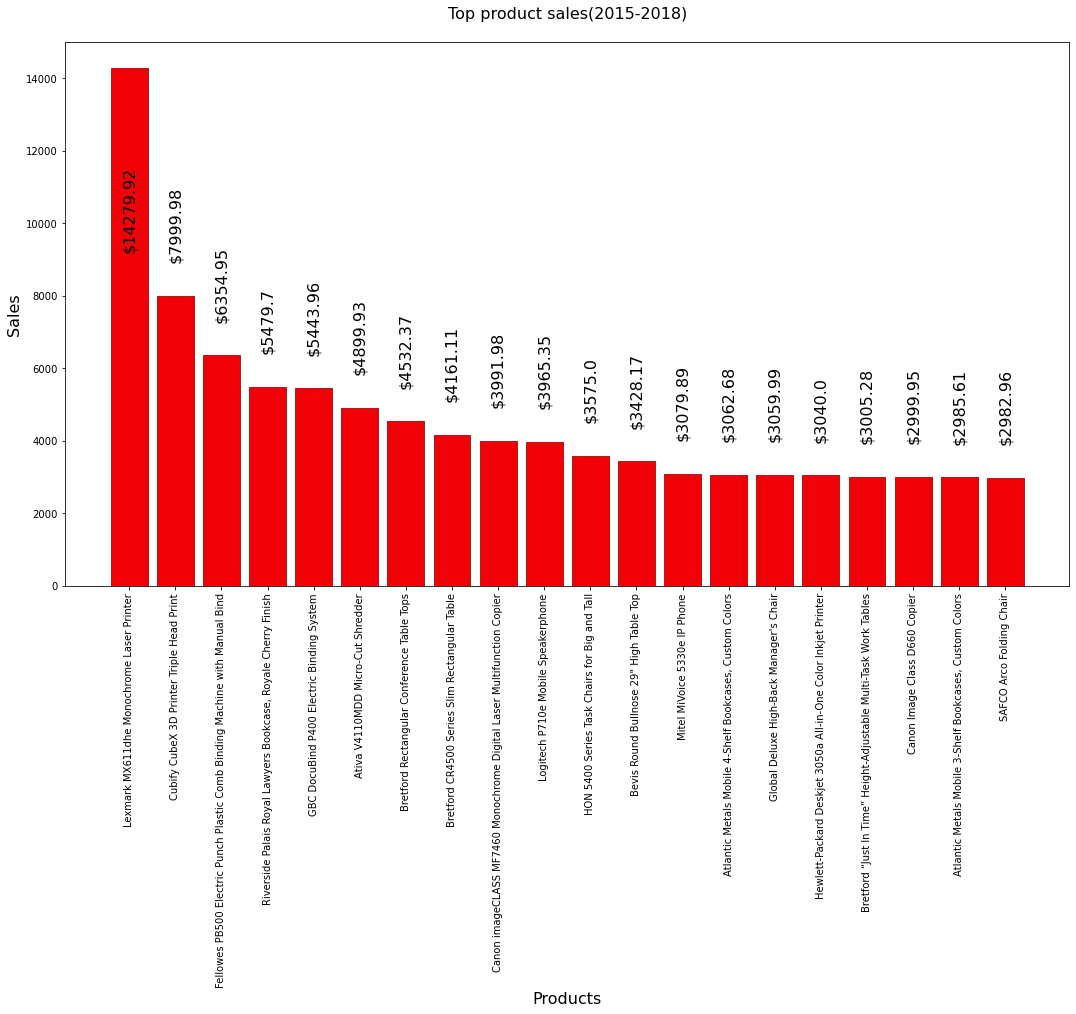

In [69]:
# plot bar of the top Products with highest sales
plt.figure(figsize=[18,10])
plt.bar(top_products.index, top_products.Sales, color='#EF0107', edgecolor='#B31B1B')
plt.xticks(rotation=90)
plt.title("Top product sales(2015-2018)\n", fontsize=16)
plt.xlabel('Products', fontsize=16)
plt.ylabel('Sales', fontsize=16)

for i, v in top_products.Sales.items():
    if v>12000:
        plt.text(i, v-5000, s='$'+str(v), color='black', fontsize=16 ,rotation=90, horizontalalignment='center')
    else:
        plt.text(i, v+1000, s='$'+str(v), color='black', fontsize=16 ,rotation=90, horizontalalignment='center')
    
plt.show()

### Get the column analysis wrt count and sales data.

In [70]:
# columns that have less than 20 unique values
cat_cols_dic = {}
for i in range(len(DATA1.nunique())):
    if DATA1.nunique().values[i]<=20:
        cat_cols_dic[DATA1.nunique().index[i]] = DATA1.nunique().values[i]

print(cat_cols_dic)

{'Ship Mode': 4, 'Segment': 3, 'Country': 1, 'Region': 4, 'Category': 3, 'Sub-Category': 17}


c:\Users\Chara\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


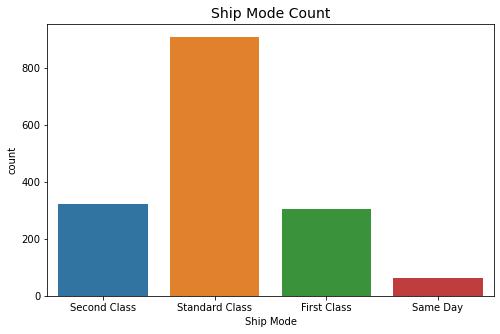

In [72]:
# ship mode count visualization
plt.figure(figsize=[8,5])
sns.countplot(DATA1['Ship Mode'])
plt.title("Ship Mode Count", fontsize=14)
plt.show()

c:\Users\Chara\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


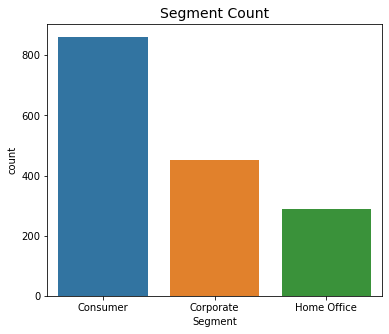

In [73]:
# segment count visualization
plt.figure(figsize=[6,5])
sns.countplot(DATA1['Segment'])
plt.title("Segment Count", fontsize=14)
plt.show()

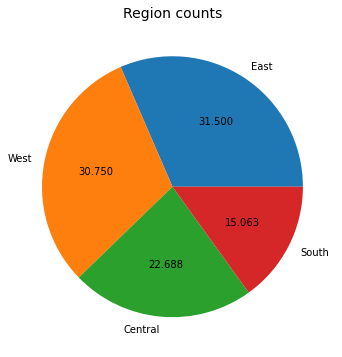

In [74]:
# pie chat for 'region'
plt.figure(figsize=[6, 6])
plt.pie(DATA1['Region'].value_counts(normalize=True), labels= DATA1['Region'].value_counts().index, autopct="%.3f")
plt.title("Region counts", fontsize=14)
plt.show()